In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

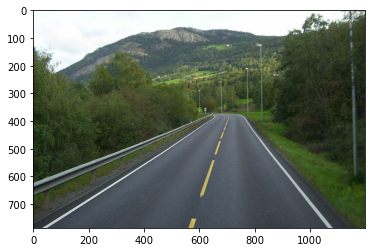

In [2]:
img = cv2.imread("road lane.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img.shape

(786, 1200, 3)

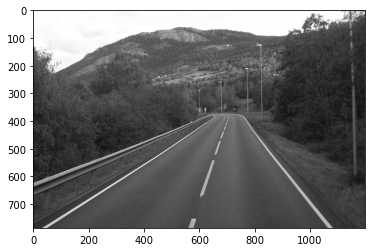

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

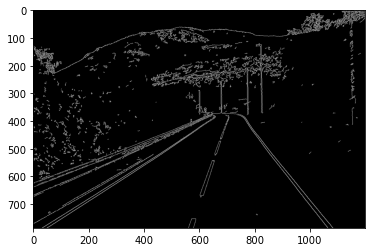

In [5]:
img_canny = cv2.Canny(img_gray, 100, 220, apertureSize=3)
plt.imshow(img_canny, cmap='gray')

In [6]:
points = np.array([[(550,780), (620,500), (970,500), (1100,780)]], dtype=np.int32)

In [7]:
def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    #channel = img.shape[2]
    #mask_color = (255,) * channel
    cv2.fillPoly(mask,vertices, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img   

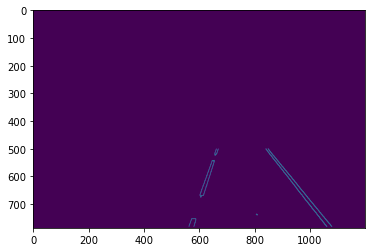

In [8]:
cropped_img = region_of_interest(img_canny,points)
plt.imshow(cropped_img)

In [9]:
lines = cv2.HoughLinesP(cropped_img, rho=2, 
                        theta=np.pi/180, 
                        threshold=50, 
                        lines=np.array([]), 
                        minLineLength=100, 
                        maxLineGap=50)

In [10]:
def draw_lines(img,lines):
    img = np.copy(img)
    line_img = np.zeros((img.shape[0],img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_img, (x1,y1), (x2,y2), (255,0,0), thickness=10)
            
    img = cv2.addWeighted(img, 0.6, line_img, 1, 0)
    return img

In [11]:
detect_lane = draw_lines(img,lines)

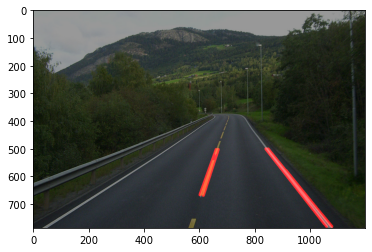

In [12]:
plt.imshow(detect_lane)